Testing using Twint tool using the code from https://github.com/pragpaudyal/tweetNLP 

Paudyal, P. (2020). GitHub - pragpaudyal/tweetNLP: Extracting tweet data using twint and analysing with NLP. GitHub. Retrieved 20 July 2021, from https://github.com/pragpaudyal/tweetNLP.

In [ ]:
!pip install twint
!pip3 install --user --upgrade git+https://github.com/twintproject/twint.git@origin/master#egg=twint
!pip 
import twint
import nest_asyncio
import pandas as pd


  Cloning https://github.com/twintproject/twint.git (to revision origin/master) to /tmp/pip-install-5zk7y609/twint_de5b985783bc44f29cf484b18d119983
  Running command git clone -q https://github.com/twintproject/twint.git /tmp/pip-install-5zk7y609/twint_de5b985783bc44f29cf484b18d119983
  Running command git checkout -q origin/master

Usage:   
  pip3 <command> [options]

Commands:
  install                     Install packages.
  download                    Download packages.
  uninstall                   Uninstall packages.
  freeze                      Output installed packages in requirements format.
  list                        List installed packages.
  show                        Show information about installed packages.
  check                       Verify installed packages have compatible dependencies.
  config                      Manage local and global configuration.
  search                      Search PyPI for packages.
  cache                       Inspect and manage pi

In [ ]:
c = twint.Config()
c.Username = "Gopleader"
#c.Search = "code"
c.Pandas= True #Enable Pandas integration.
c.Limit= 100
nest_asyncio.apply()
twint.run.Search(c)

1421598927556579328 2021-07-31 22:29:31 +0000 <GOPLeader> Inflation is a tax increase on every American. Yet in Ohio last week, President Biden said: “I don’t know anybody … who’s worried about inflation.”  He needs to get a clue.
1421522699428536323 2021-07-31 17:26:36 +0000 <GOPLeader> Mark my words: Democrats' new mask mandates are just the beginning. Next they are going to try to keep your kids' schools closed and then they'll try to shut down small businesses again.   They are desperate for control.  https://t.co/5UdrMdzYu8
1421446518503100417 2021-07-31 12:23:53 +0000 <GOPLeader> The House of Representatives is the PEOPLE’S House. Not Pelosi’s House.  https://t.co/EJLM00QhjI
1421221814508924931 2021-07-30 21:31:00 +0000 <GOPLeader> Your groceries are more expensive. Your streets are less safe. Your border is wide open.   And now Democrats are targeting you with a mask mandate—even if you are vaccinated.  https://t.co/BZcFUKRi11
1421179271259766787 2021-07-30 18:41:57 +0000 <GOPLe

In [ ]:
#Saving data into a data frame

def columne_names():
  return twint.output.panda.Tweets_df.columns
def twint_to_pd(columns):
  return twint.output.panda.Tweets_df[columns]

data= twint_to_pd(["tweet"])
data.head()

,tweet
0,Inflation is a tax increase on every American....
1,Mark my words: Democrats' new mask mandates ar...
2,The House of Representatives is the PEOPLE’S H...
3,Your groceries are more expensive. Your street...
4,Join me in welcoming the newest Republican mem...


In [ ]:
# make second data frame
c = twint.Config()
c.Username = "kevinomccarthy"
#c.Search = "code"
c.Pandas= True #Enable Pandas integration.
c.Limit= 100
nest_asyncio.apply()
twint.run.Search(c)

1417888341702348807 2021-07-21 16:44:58 +0000 <kevinomccarthy> Integrity?  https://t.co/Ac4OoxBaOD
1417617182868090886 2021-07-20 22:47:29 +0000 <kevinomccarthy> My sincere thanks to @GOPChairwoman for making the call to transfer $5M to @NRCC last quarter. Onward to victory in ’22!  https://t.co/Jd02L0aEsB
1417292925827010569 2021-07-20 01:19:00 +0000 <kevinomccarthy> The numbers don’t lie. Voters are less than pleased w/ the Biden economy.   86% worried about inflation 79% worried about rising gas prices 73% concerned about impending tax increases  https://t.co/nvIqnCUsVM
1415870346289418243 2021-07-16 03:06:10 +0000 <kevinomccarthy> I appreciate President Trump’s commitment to help House Republicans defeat Democrats and Take Back the House in 2022. Join our team at  https://t.co/p3qwn7NNY4 🇺🇸  https://t.co/pLfeNOmIqg
1415377962363498497 2021-07-14 18:29:37 +0000 <kevinomccarthy> JOB WELL DONE, Chairman Emmer, Whip Scalise, and Chairwoman Stefanik! 🇺🇸
1414934385300852736 2021-07-13 13

In [ ]:
data_new= twint_to_pd(["tweet"])
data_new.head()

,tweet
0,Integrity? https://t.co/Ac4OoxBaOD
1,My sincere thanks to @GOPChairwoman for making...
2,The numbers don’t lie. Voters are less than pl...
3,I appreciate President Trump’s commitment to h...
4,"JOB WELL DONE, Chairman Emmer, Whip Scalise, a..."


In [ ]:
# Append data_new to data
data = data.append(data_new)

In [ ]:
# import nltk libraries

import nltk
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import re
import string

In [ ]:
data["tweet"]= data["tweet"].str.replace("[^a-zA-Z0-9]", " ")

In [ ]:
data

,tweet
0,Inflation is a tax increase on every American ...
1,Mark my words Democrats new mask mandates ar...
2,The House of Representatives is the PEOPLE S H...
3,Your groceries are more expensive Your street...
4,Join me in welcoming the newest Republican mem...
...,...
95,WesleyHuntTX let s keep the momentum rolling...
96,Big night in TX Congrats bethvanduyne Onwar...
97,Kay Granger is Texas tough through and through...
98,CA23 is a special place it is my highest ho...


In [ ]:
# removing short words/ punctuation
data["tweet"]= data["tweet"].apply(lambda x: " ".join ([w for w in x.split() if len (w)>3]))

In [ ]:
# tokenize the data

def tokenize(text):
    tokens = re.split("\W+", text)
    return tokens
data['tweet']= data['tweet'].apply (lambda x: tokenize(x.lower()))

In [ ]:
nltk.download("stopwords")
stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# remove stopwords

def remove_stopword(text):
    text_nostopword= [char for char in text if char not in stopwords]
    return text_nostopword

data['tweet']= data['tweet'].apply(lambda x: remove_stopword(x))

In [ ]:
data

,tweet
0,"[inflation, increase, every, american, ohio, l..."
1,"[mark, words, democrats, mask, mandates, begin..."
2,"[house, representatives, people, house, pelosi..."
3,"[groceries, expensive, streets, less, safe, bo..."
4,"[join, welcoming, newest, republican, member, ..."
...,...
95,"[wesleyhunttx, keep, momentum, rolling, congra..."
96,"[night, congrats, bethvanduyne, onward, victor..."
97,"[granger, texas, tough, congrats, grangercampa..."
98,"[ca23, special, place, highest, honor, serve, ..."


In [ ]:
# Porter Stemmer
ps= nltk.PorterStemmer()

In [ ]:
# stemming 

def stem(tweet_no_stopword):
   text = [ps.stem ( word) for word in tweet_no_stopword]
   return text

data["tweet"]= data["tweet"].apply(lambda x: stem(x))

In [ ]:
data= pd.DataFrame(data["tweet"])

In [ ]:
data

,tweet
0,"[inflat, increas, everi, american, ohio, last,..."
1,"[mark, word, democrat, mask, mandat, begin, ne..."
2,"[hous, repres, peopl, hous, pelosi, hous, http..."
3,"[groceri, expens, street, less, safe, border, ..."
4,"[join, welcom, newest, republican, member, con..."
...,...
95,"[wesleyhunttx, keep, momentum, roll, congrat, ..."
96,"[night, congrat, bethvanduyn, onward, victori,..."
97,"[granger, texa, tough, congrat, grangercampaig..."
98,"[ca23, special, place, highest, honor, serv, c..."


In [ ]:
data_list = data.loc[:,"tweet"].to_list()
len(data_list)

200

In [ ]:
# putting the twitter in flat list
flat_data_list = [item for sublist in data_list for item in sublist]
len(flat_data_list)

3058

In [ ]:
data_count= pd.DataFrame(flat_data_list)
data_count= data_count[0].value_counts()

In [ ]:
from nltk.probability import FreqDist
freq_count= FreqDist()
for words in data_count:
  freq_count[words] +=1

freq_count

FreqDist({1: 809,
          2: 204,
          3: 87,
          4: 58,
          5: 27,
          6: 21,
          7: 18,
          8: 9,
          9: 6,
          10: 5,
          11: 7,
          12: 6,
          13: 3,
          14: 2,
          15: 3,
          16: 1,
          17: 2,
          20: 2,
          21: 1,
          22: 1,
          23: 1,
          24: 1,
          26: 1,
          30: 1,
          32: 1,
          34: 1,
          36: 1,
          42: 1,
          144: 1})

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


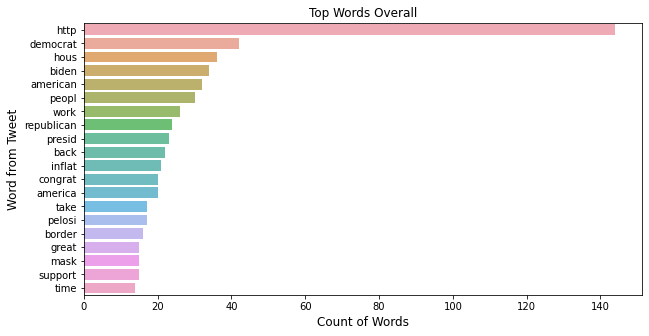

In [ ]:
data_count = data_count[:20,]
plt.figure(figsize=(10,5))
sns.barplot(data_count.values, data_count.index, alpha=0.8)
plt.title('Top Words Overall')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()